# South African Language Identification Hack 2022

© Tosin Adebowale

<a id="shorthand"></a>

## Table of Contents

<a href=#zero>0. Comet</a>

<a href=#one>1. Packages</a>

<a href=#two>2. Data</a>

<a href=#three>3. Data Description</a>

<a href=#four>4. Data Cleaning</a>

* <a href=#four_zero>4.0. General data cleaning</a>

* <a href=#four_one>4.1. StopWords</a>

* <a href=#four_two>4.2. Tokenisation</a>

* <a href=#four_three>4.3. Stemming</a>

* <a href=#four_four>4.4. Lemmatization</a>

* <a href=#four_five>4.5. Resampling</a>

<a href=#five>5. Model Files</a>

* <a href=#five_zero>5.0. Prepare features</a>

* <a href=#five_one>5.1. Scaling features</a>

* <a href=#five_two>5.2. Prepare label</a>

* <a href=#five_three>5.3. Train_Test_Split</a>

<a href=#six>6. Modelling</a>

* <a href=#six_zero>6.0. Improve model individually</a>

* <a href=#six_one>6.1. Model Performance</a>

* <a href=#six_two>6.2. Run all models</a>

* <a href=#six_three>6.3. Kaggle Submission</a>

<a href=#seven>7. End Comet Experiment</a>

<a href=#eight>8. Extra</a>

<a id="zero"></a>
## 0. Comet
<a href=#shorthand>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Importing comet and and setting up experiments.<center>**

---

In [30]:
# pip install comet_ml

In [31]:
# Import comet_ml at the top of your file

from comet_ml import Experiment

In [32]:
# Create an experiment with your api key and details specific to your personal comet

experiment = Experiment(
    api_key="qsOVXkhUhq870yZ5QARvTqNEw",
    project_name="south-african-language-identification-2022",
    workspace="toarstn92",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/toarstn92/south-african-language-identification-2022/88f4c4186c094071baf792d4fbd8228b



<a id="one"></a>
## 1. Packages
<a href=#shorthand>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Importing and briefly discussing libraries used during analysis and modelling.<center>**

**<center>Downloading nltk corpora of interest.<center>**

---

In [33]:
# pip install libraries that fails to import

# pip install "package name"

In [34]:
# import necessary libraries

import numpy as np
import pandas as pd
from prettytable import PrettyTable
from astropy.table import Table, Column

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import re
import string
from spellchecker import SpellChecker
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from plotly import graph_objs as go
import plotly.express as px
from collections import Counter
from varname import nameof
from PIL import Image
import pickle

from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.corpus import stopwords
from nltk.util import ngrams

import time

# set plot style

sns.set()

# suppress cell warnings

# import warnings
# warnings.filterwarnings("ignore")

In [35]:
# download nltk content

# nltk.download("wordnet")
# nltk.download("stopwords")
# nltk.download("omw-1.4")

In [36]:
# set output options for all categories

pd.set_option("max_colwidth", 500)
plt.rcParams["figure.figsize"] = (10, 7)

<a id="two"></a>
## 2. Data
<a href=#linkup>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Loading data into DataFrame.<center>**

---

In [37]:
# load data

lang = pd.read_csv("data/train_set.csv")
lang.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


<a id="three"></a>
## 3. Data Description
<a href=#linkup>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.

**File descriptions**

    train_set.csv - the training set
    test_set.csv - the test set
    sample_submission.csv - a sample submission file in the correct format

**Language IDs**

    afr - Afrikaans
    eng - English
    nbl - isiNdebele
    nso - Sepedi
    sot - Sesotho
    ssw - siSwati
    tsn - Setswana
    tso - Xitsonga
    ven - Tshivenda
    xho - isiXhosa
    zul - isiZulu
    
---

In [38]:
# create copy to describe data

describe = lang.copy()

In [39]:
# observe data size

describe.shape

(33000, 2)

In [40]:
languages = list(describe["lang_id"].unique())
print(languages, len(languages))

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr'] 11


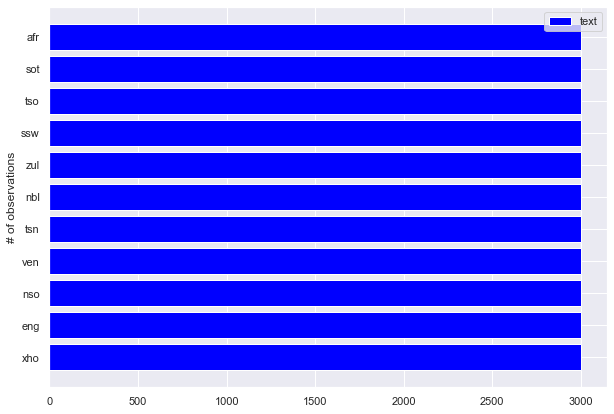

In [41]:
heights = []
for i in languages:
    new = describe[describe["lang_id"]==i]
    heights.append(len(new))

plt.barh(languages,heights,color="blue")
plt.yticks(languages)
plt.ylabel("# of observations")
plt.legend(["text"])
plt.show()

In [42]:
# function to create wordcloud; word representation of data

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    # callable function for wordcloud.color_func that overwrites colormap and returns a PIL color for each word
    return("hsl(0, 100%%, %d%%)" % 100) # change values to set color need in hsl format

def wordcloud_draw(data, color="black", max_font_size=100, figure_size=(12, 12), title = None, title_size=30, image_color=True):
    """ 
    Takes in one DataFrame as data

            Parameters
            ----------
            color: str
                Background color of output
                
            max_font_size: int
                Smallest font size to use. Will stop when there is no more room in this size
                
            figure_size: int tuple
                output size
                
            title: str
                wordcloud title
                
            title_size: int
                font size of title

            image_color: bool
                if True, display word with different colors
                elif False, display all words in white

            Returns
            -------
            Wordcloud
    """
    words = " ".join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(background_color=color,
                      width=1500,
                      height=1000,
                      random_state=42,
                      max_font_size = max_font_size
                     ).generate(cleaned_word)
    
    plt.figure(figsize=figure_size)
    if image_color:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={"size": title_size, "color": "black", 
                                  "verticalalignment": "bottom"})
    else:
        plt.imshow(wordcloud.recolor(color_func=grey_color_func), interpolation="bilinear");
        plt.title(title, fontdict={"size": title_size,  
                                  "verticalalignment": "bottom"})
    plt.axis("off");
    plt.tight_layout()

In [43]:
wordcloud_draw(describe["text"], color="black", max_font_size=100, figure_size=(12, 12), title_size=30, title="Words in South African Languages")

<a id="four"></a>
## 4. Data Cleaning
<a href=#linkup>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Cleaning the Data.<center>**

---

In [ ]:
# create copy to clean data

clean = describe.copy()

In [ ]:
# function to remove punctuation, numbers andchange uppercase to lower

def remove_punctuation_numbers_caps(message):
    punc_numbers = string.punctuation + "0123456789"
    return "".join([l.lower() for l in message if (l not in punc_numbers) or (len(l)>=3)])

clean["text"] = clean["text"].apply(remove_punctuation_numbers_caps)

In [ ]:
clean.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,idha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga idha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulunatal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


In [ ]:
# function to interactively display most Common words in data

def common_words(data, word_qty=30, arrange="Least", file=None, style_seen=None):
    """ 
    Takes in column from DataFrame as data

            Parameters
            ----------
            word_qty: int
                Number of words to display
                
            arrange: str
                if Least, display least occuring words
                elif Most, display most occuring words

            fike: str
                path to save output + file name without extension
                e.g. "home/resource/file_name"

            style_seen: str
                if None, output interactive display
                if "png" or "jpeg", output static display

            Returns
            -------
            interactive plot display
    """
    df = data.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df for item in sublist])
    if "Least" in arrange:
        temp = pd.DataFrame(top.most_common()[::-1])[:word_qty]
    elif "Most" in arrange:
        temp = pd.DataFrame(top.most_common())[:word_qty]
    temp.columns = ["common_words","count"]
    temp.style.background_gradient(cmap="Blues")
    fig = px.bar(temp, x="count", y="common_words", title=arrange+" Commmon Words in South Africa",
                orientation="h", width=700, height=700,color="common_words")
    if file:
        fig.write_html(file+".html")
        fig.write_image(file+".png")
    return fig.show(style_seen)

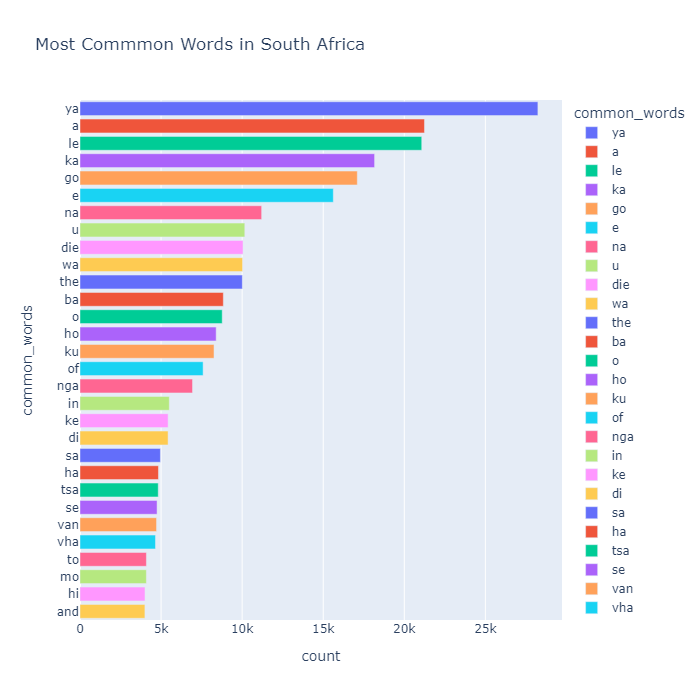

In [ ]:
common_words(clean["text"], 30, arrange="Most", file="plot/SA_words", style_seen="png")

<a id="five"></a>
## 5. Model Files
<a href=#linkup>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Preparing data to train model with.<center>**

---

In [ ]:
# create copy to prepare data

prepare = clean.copy()

In [ ]:
# split into feature(text) and label(language)

text = prepare["text"]
language = prepare["lang_id"]

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(text, language, test_size=0.2, random_state=5, stratify=language)

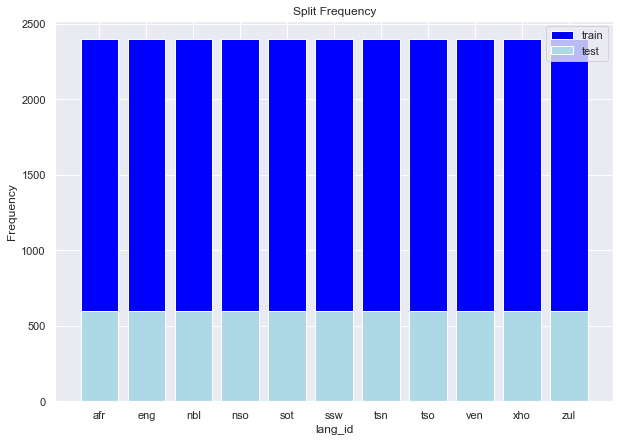

In [ ]:
# plot split across languages

unique, counts = np.unique(train_labels, return_counts=True)
plt.bar(unique, counts, color="blue")
unique, counts = np.unique(test_labels, return_counts=True)
plt.bar(unique, counts, color="lightblue")

plt.title("Split Frequency")
plt.xlabel("lang_id")
plt.ylabel("Frequency")
plt.xticks(languages)
plt.legend(["train", "test"])

plt.show()

 <a id="six"></a>
## 6. Modelling
<a href=#linkup>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Developing model and evaluate accuracy.<center>**

---

<a id="six_zero"></a>
### 6.0. Improve model

<a href=#six>Back to Modelling</a>

In [ ]:
# base vectorizers

t_vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer="char")

c_vectorizer = CountVectorizer(analyzer='char', stop_words=None, ngram_range=(1,3))

In [ ]:
# build pipelines using base vectorisers individually with LogisticRegression, RandomForestClassifier, LinearSVC and MultinomialNB

pipe_lr_t13 = Pipeline([
    ("vectorizer", t_vectorizer),
    ("clf", LogisticRegression(max_iter=3000))
    ])

pipe_rf_t13 = Pipeline([
    ("vectorizer", t_vectorizer),
    ("clf", RandomForestClassifier())
    ])

pipe_lscv_t13 = Pipeline([
    ("vectorizer", t_vectorizer),
    ("clf", LinearSVC(dual=False))
    ])

pipe_mnb_t13 = Pipeline([
    ("vectorizer", t_vectorizer),
    ("clf", MultinomialNB())
    ])

pipe_lr_c13 = Pipeline([
    ("vectorizer", c_vectorizer),
    ("clf", LogisticRegression(max_iter=3000))
    ])

pipe_rf_c13 = Pipeline([
    ("vectorizer", c_vectorizer),
    ("clf", RandomForestClassifier())
    ])

pipe_lscv_c13 = Pipeline([
    ("vectorizer", c_vectorizer),
    ("clf", LinearSVC(dual=False))
    ])

pipe_mnb_c13 = Pipeline([
    ("vectorizer", c_vectorizer),
    ("clf", MultinomialNB())
    ])

In [ ]:
# fit pipelines to train files

print("fitting to pipeline 1.....")
pipe_lr_t13.fit(train_features, train_labels)

print("fitting to pipeline 2.....")
pipe_rf_t13.fit(train_features, train_labels)

print("fitting to pipeline 3.....")
pipe_lscv_t13.fit(train_features, train_labels)

print("fitting to pipeline 4.....")
pipe_mnb_t13.fit(train_features, train_labels)

print("fitting to pipeline 5.....")
pipe_lr_c13.fit(train_features, train_labels)

print("fitting to pipeline 6.....")
pipe_rf_c13.fit(train_features, train_labels)

print("fitting to pipeline 7.....")
pipe_lscv_c13.fit(train_features, train_labels)

print("fitting to pipeline 8.....")
pipe_mnb_c13.fit(train_features, train_labels)

In [ ]:
# predict using fitted pipelines

print("predicting using pipeline 1.....")
y_pred_lr_t13 = pipe_lr_t13.predict(test_features)

print("predicting using pipeline 2.....")
y_pred_rf_t13 = pipe_rf_t13.predict(test_features)

print("predicting using pipeline 3.....")
y_pred_lscv_t13 = pipe_lscv_t13.predict(test_features)

print("predicting using pipeline 4.....")
y_pred_mnb_t13 = pipe_mnb_t13.predict(test_features)

print("predicting using pipeline 5.....")
y_pred_lr_c13 = pipe_lr_c13.predict(test_features)

print("predicting using pipeline 6.....")
y_pred_rf_c13 = pipe_rf_c13.predict(test_features)

print("predicting using pipeline 7.....")
y_pred_lscv_c13 = pipe_lscv_c13.predict(test_features)

print("predicting using pipeline 8.....")
y_pred_mnb_c13 = pipe_mnb_c13.predict(test_features)

In [ ]:
# accuracy scores of predicted values

acc_lr_t13      = accuracy_score(test_labels, y_pred_lr_t13)
acc_rf_t13      = accuracy_score(test_labels, y_pred_rf_t13)
acc_lscv_t13    = accuracy_score(test_labels, y_pred_lscv_t13)
acc_mnb_t13     = accuracy_score(test_labels, y_pred_mnb_t13)
acc_lr_c13      = accuracy_score(test_labels, y_pred_lr_c13)
acc_rf_c13      = accuracy_score(test_labels, y_pred_rf_c13)
acc_lscv_c13    = accuracy_score(test_labels, y_pred_lscv_c13)
acc_mnb_c13     = accuracy_score(test_labels, y_pred_mnb_c13)

In [ ]:
# tabulate accuracy scores

Model_Table = PrettyTable()
Model_Table.field_names = [" ", "   Logistic Regression   ", "   Random forest Classififier  ", "     Linear SVC       ","   Multinomial Naive Bayes   "]
Model_Table.add_row(["  TfidfVect  ", round(acc_lr_t13,5),round(acc_rf_t13,5),round(acc_lscv_t13,5),round(acc_mnb_t13,5)])
Model_Table.add_row(["  CountVect  ", round(acc_lr_c13,5),round(acc_rf_c13,5),round(acc_lscv_c13,5),round(acc_mnb_c13,5)])
print("Performance of all models:")
print(Model_Table)

In [ ]:
# include scaler to pipeline steps using top models and change analyzer to "char_wb"; limiting ngram selection to word length

pipe_mnb_t110_chw_maxab = Pipeline([
    ("vectorizer", TfidfVectorizer(ngram_range=(1,10), analyzer="char_wb")),
    ('scaler', MaxAbsScaler()),
    ("clf", MultinomialNB())
    ])

pipe_lscv_t110_chw_maxab = Pipeline([
    ("vectorizer", TfidfVectorizer(ngram_range=(1,10), analyzer="char_wb")),
    ('scaler', MaxAbsScaler()),
    ("clf", LinearSVC(dual=False))
    ])

In [ ]:
print("fitting to pipeline 9.....")
pipe_mnb_t110_chw_maxab.fit(train_features, train_labels)

print("fitting to pipeline 10.....")
pipe_lscv_t110_chw_maxab.fit(train_features, train_labels)

In [ ]:
print("predicting using pipeline 9.....")
y_pred_mnb_t110_chw_maxab = pipe_mnb_t110_chw_maxab.predict(test_features)

print("predicting using pipeline 10.....")
y_pred_lscv_t110_chw_maxab = pipe_lscv_t110_chw_maxab.predict(test_features)

In [ ]:
acc_mnb_t110_chw_maxab  = accuracy_score(test_labels, y_pred_mnb_t110_chw_maxab)
acc_lscv_t110_chw_maxab = accuracy_score(test_labels, y_pred_lscv_t110_chw_maxab)

acc_mnb_t110_chw_maxab, acc_lscv_t110_chw_maxab

In [ ]:
# include a transformer step to pipeline

pipe_mnb_t110_chw_tt_maxab = Pipeline([
    ("vectorizer", TfidfVectorizer(ngram_range=(1,10), analyzer="char_wb")),
    ("transformer", TfidfTransformer(norm="l1", sublinear_tf=True)),
    ('scaler', MaxAbsScaler()),
    ("clf", MultinomialNB())
    ])

pipe_mnb_c110_ch_tt_maxab = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1,10), analyzer="char")),
    ("transformer", TfidfTransformer(norm="l1", sublinear_tf=True)),
    ('scaler', MaxAbsScaler()),
    ("clf", MultinomialNB())
    ])

In [ ]:
print("fitting to pipeline 11.....")
pipe_mnb_t110_chw_tt_maxab.fit(train_features, train_labels)

print("fitting to pipeline 12.....")
pipe_mnb_c110_ch_tt_maxab.fit(train_features, train_labels)

In [ ]:
print("predicting using pipeline 11.....")
y_pred_mnb_t110_chw_tt_maxab = pipe_mnb_t110_chw_tt_maxab.predict(test_features)

print("predicting using pipeline 12.....")
y_pred_mnb_c110_ch_tt_maxab = pipe_mnb_c110_ch_tt_maxab.predict(test_features)

In [ ]:
acc_mnb_t110_chw_tt_maxab   = accuracy_score(test_labels, y_pred_mnb_t110_chw_tt_maxab)
acc_mnb_c110_ch_tt_maxab    = accuracy_score(test_labels, y_pred_mnb_c110_ch_tt_maxab)

acc_mnb_t110_chw_tt_maxab, acc_mnb_c110_ch_tt_maxab

<a id="six_one"></a>
### 6.1. Model Performance

<a href=#six>Back to Modelling</a>

In [ ]:
# function to plot cunfusion matrix on sns heatmap + other details

categories = np.unique(test_labels)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.yticks(rotation=0)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

Function reference: **[make_confusion_matrix](https://github.com/DTrimarchi10/confusion_matrix)**

In [ ]:
y_pred = y_pred_mnb_c110_ch_tt_maxab.copy()

In [ ]:
matrix = confusion_matrix(test_labels, y_pred)
acc = accuracy_score(test_labels, y_pred)
acc

In [ ]:
make_confusion_matrix(matrix,
                      categories=categories, 
                      figsize=(16,10))

<a id="six_three"></a>
### 6.3. Kaggle Submission

<a href=#six>Back to Modelling</a>

In [ ]:
# load data unseen by model

unseen = pd.read_csv("data/test_set.csv")
unseen.head()

In [ ]:
unseen.shape

In [ ]:
# preprocess unseen data as train data

unseen["text"] = unseen["text"].apply(remove_punctuation_numbers_caps)

In [ ]:
# chosen model

model = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1,10), analyzer="char")),
    ("transformer", TfidfTransformer(norm="l1", sublinear_tf=True)),
    ('scaler', MaxAbsScaler()),
    ("clf", MultinomialNB())
    ])

In [ ]:
# data preprocessing

model.fit(text, language)

In [ ]:
# predict lang_id of unseen data

unseen_prediction = model.predict(unseen["text"])
len(unseen_prediction)

In [ ]:
# create submission DataFrame according to template provided

unseen_series = pd.Series(unseen_prediction)
pred = unseen_series.to_frame()
pred = pred.rename(columns = {0:"lang_id"})
sub_df = pd.read_csv("data/test_set.csv")[["index"]]
sub_df2 = sub_df.join(other = pred)
sub_df2.head()

In [ ]:
# check unique lang_id inprediction

languages = list(sub_df2["lang_id"].unique())
print(languages, len(languages))

SyntaxError: invalid syntax (3848666601.py, line 1)

In [ ]:
sub_df2.to_csv("submission/sub_pipe_mnb_c110_ch_tt_maxab.csv", index=False)

 <a id="seven"></a>
## 7. End Comet Experiment
<a href=#linkup>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Create logs and ending experiment.<center>**

---

In [ ]:
# Create dictionaries for data to be logged

params = {"clean": "punc_num_cap",
          "resample": False,
          "vectorizer": "CountVectorizer(ngram_range=(1,10), analyzer='char')",
          "transformer": "TfidfTransformer(norm='l1', sublinear_tf=True)",
          "scaler": "MaxAbsScaler",
          "test size": 0.2,
          "stratify": True,
          "split_random_state": 5,
          "model_type": "MultinomialNB()"
          }
metrics_score = {"acuracy": acc
           }

In [ ]:
# Log our parameters and results

experiment.log_parameters(params)
experiment.log_metrics(metrics_score)
experiment.log_confusion_matrix(test_labels, y_pred)

In [ ]:
experiment.end()

In [ ]:
# experiment.display()